In [3]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the correct path to your folder
folder_path = "/content/drive/MyDrive/Capstone"
df = folder_path + '/Final_h1n1_fulldataset_CLEANED_Labels.csv'

Mounted at /content/drive


In [6]:
import pandas as pd
df = pd.read_csv('/content/Final_h1n1_fulldataset_CLEANED_Labels.csv')

# Remove the first column
df = df.iloc[:, 1:]

# Specify the columns you want to keep
columns_to_keep = [
    "Vaccination_General", "doctor_recc_h1n1", "doctor_recc_seasonal", "health_insurance",
    "opinion_h1n1_risk", "opinion_seas_vacc_effective", "opinion_h1n1_vacc_effective","opinion_seas_risk",
    "age_group", "employment_industry", "h1n1_concern", "h1n1_knowledge",
    "chronic_med_condition", "race", "sex", "income_poverty"
]

# Keep only those columns
df = df[columns_to_keep]
df.shape[1]
df

,Vaccination_General,doctor_recc_h1n1,doctor_recc_seasonal,health_insurance,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_h1n1_vacc_effective,opinion_seas_risk,age_group,employment_industry,h1n1_concern,h1n1_knowledge,chronic_med_condition,race,sex,income_poverty
0,0,0,0,1,1,2,3,1,55 - 64 Years,fcxhlnwr,1,0,0,White,Female,Below Poverty
1,2,0,0,1,4,4,5,2,35 - 44 Years,pxcmvdjn,3,2,0,White,Male,Below Poverty
2,0,0,0,1,1,4,3,1,18 - 34 Years,rucpziij,1,1,1,White,Male,"<= $75,000, Above Poverty"
3,2,0,1,0,3,5,3,4,65+ Years,mfikgejo,1,1,1,White,Female,Below Poverty
4,0,0,0,1,3,3,3,1,45 - 54 Years,wxleyezf,2,1,0,White,Female,"<= $75,000, Above Poverty"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0,0,0,0,1,5,3,2,65+ Years,qnlwzans,2,0,0,White,Female,"<= $75,000, Above Poverty"
26703,0,1,1,1,2,5,4,1,18 - 34 Years,fcxhlnwr,1,2,0,White,Male,"<= $75,000, Above Poverty"
26704,2,0,0,0,4,5,4,4,55 - 64 Years,dotnnunm,2,2,0,White,Female,"<= $75,000, Above Poverty"
26705,0,0,0,0,1,2,3,1,18 - 34 Years,fcxhlnwr,1,1,0,Hispanic,Female,"<= $75,000, Above Poverty"


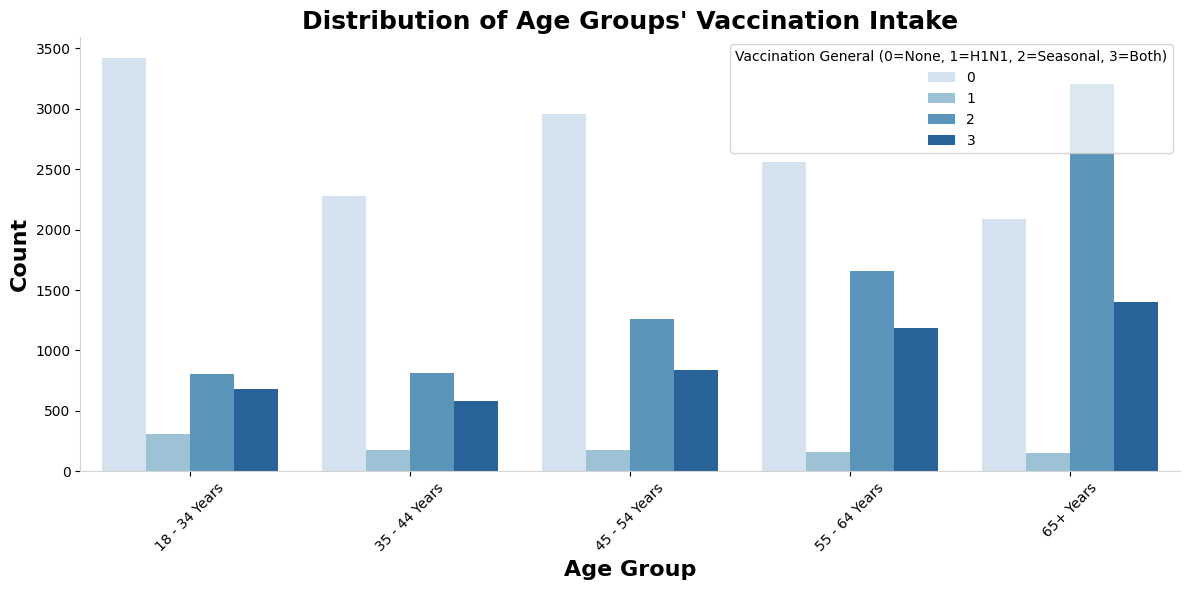

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the correct order for age groups
age_order = ["18 - 34 Years", "35 - 44 Years", "45 - 54 Years", "55 - 64 Years", "65+ Years"]

# Convert to int to clean up legend labels
df["Vaccination_General"] = df["Vaccination_General"].astype(int)

plt.figure(figsize=(12, 6))
sns.countplot(
    x="age_group",
    hue="Vaccination_General",
    data=df,
    palette=sns.color_palette("Blues", n_colors=4),
    order=age_order
)
plt.title("Distribution of Age Groups' Vaccination Intake", fontweight='bold', fontsize=18)
plt.xlabel("Age Group", fontweight='bold', fontsize=16)
plt.ylabel("Count", fontweight='bold', fontsize=16)
plt.legend(title="Vaccination General (0=None, 1=H1N1, 2=Seasonal, 3=Both)")
plt.xticks(rotation=45)

ax = plt.gca()  # Get current axes

# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Customize left and bottom spines
ax.spines["left"].set_color("lightgray")
ax.spines["bottom"].set_color("lightgray")

plt.tight_layout()
plt.show()


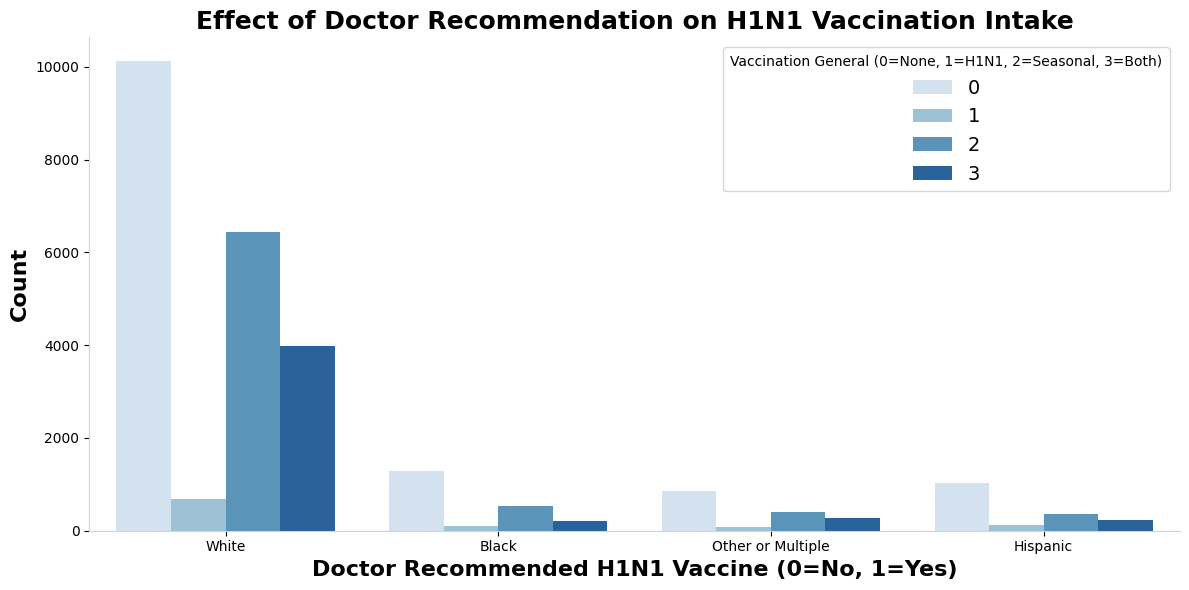

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x="race", hue="Vaccination_General", data=df, palette=sns.color_palette("Blues", n_colors=4))
plt.title("Effect of Doctor Recommendation on H1N1 Vaccination Intake", fontweight='bold', fontsize=18)
plt.xlabel("Doctor Recommended H1N1 Vaccine (0=No, 1=Yes)", fontweight='bold', fontsize=16)
plt.ylabel("Count", fontweight='bold', fontsize=16)
plt.legend(title="Vaccination General (0=None, 1=H1N1, 2=Seasonal, 3=Both)", fontsize=14)

ax = plt.gca()  # Get current axes
# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Customize left and bottom spines
ax.spines["left"].set_color("lightgray")
ax.spines["bottom"].set_color("lightgray")

plt.tight_layout()
plt.show()

#Doctor recommendation significantly increases vaccine uptake, especially for both vaccines. When no recommendation is given, the majority remain unvaccinated.

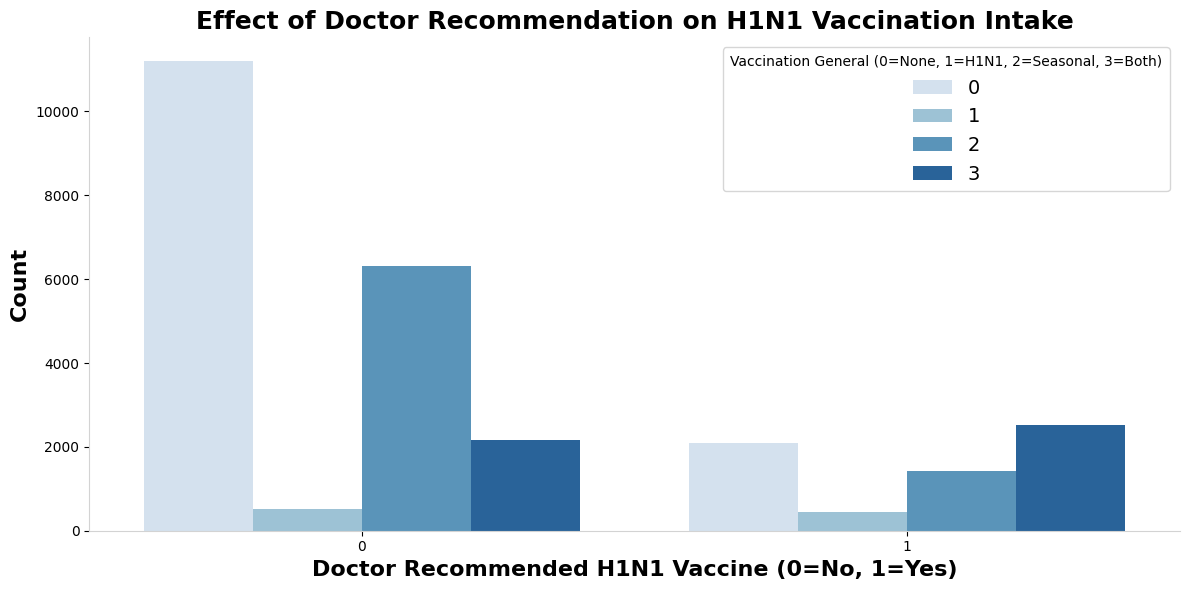

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x="doctor_recc_h1n1", hue="Vaccination_General", data=df, palette=sns.color_palette("Blues", n_colors=4))
plt.title("Effect of Doctor Recommendation on H1N1 Vaccination Intake", fontweight='bold', fontsize=18)
plt.xlabel("Doctor Recommended H1N1 Vaccine (0=No, 1=Yes)", fontweight='bold', fontsize=16)
plt.ylabel("Count", fontweight='bold', fontsize=16)
plt.legend(title="Vaccination General (0=None, 1=H1N1, 2=Seasonal, 3=Both)", fontsize=14)

ax = plt.gca()  # Get current axes
# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Customize left and bottom spines
ax.spines["left"].set_color("lightgray")
ax.spines["bottom"].set_color("lightgray")

plt.tight_layout()
plt.show()

#Doctor recommendation significantly increases vaccine uptake, especially for both vaccines. When no recommendation is given, the majority remain unvaccinated.

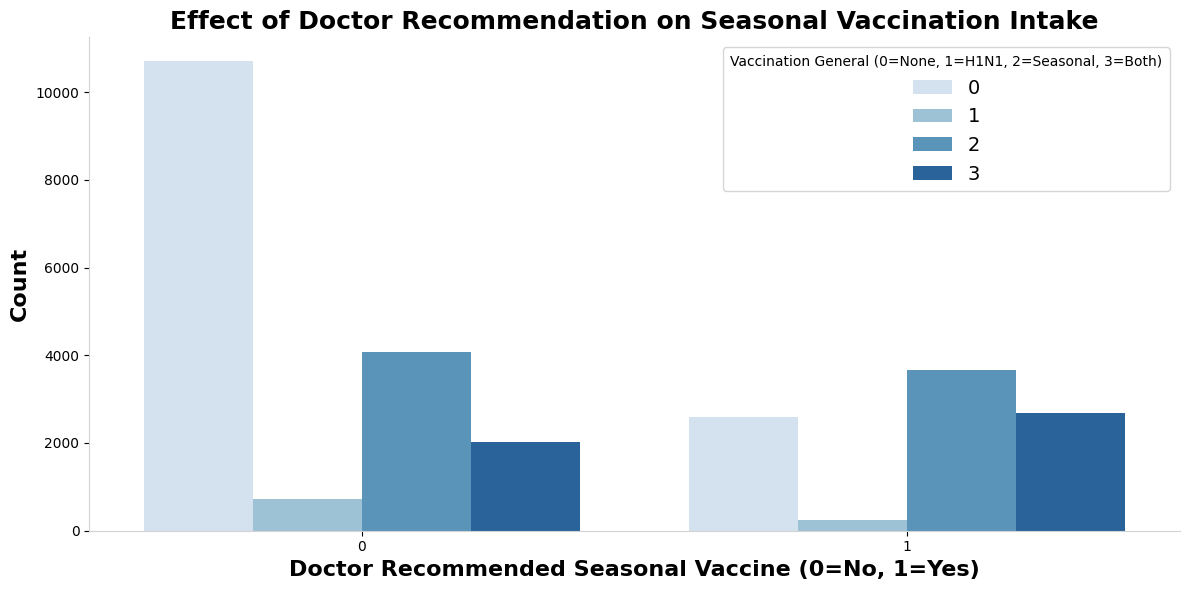

In [60]:
plt.figure(figsize=(12, 6))
sns.countplot(x="doctor_recc_seasonal", hue="Vaccination_General", data=df, palette=sns.color_palette("Blues", n_colors=4))
plt.title("Effect of Doctor Recommendation on Seasonal Vaccination Intake", fontweight='bold', fontsize=18)
plt.xlabel("Doctor Recommended Seasonal Vaccine (0=No, 1=Yes)", fontweight='bold', fontsize=16)
plt.ylabel("Count", fontweight='bold', fontsize=16)
plt.legend(title="Vaccination General (0=None, 1=H1N1, 2=Seasonal, 3=Both)", fontsize=14)

ax = plt.gca()  # Get current axes
# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Customize left and bottom spines
ax.spines["left"].set_color("lightgray")
ax.spines["bottom"].set_color("lightgray")
plt.tight_layout()
plt.show()

#Similar to H1N1, a doctor's recommendation for the seasonal vaccine greatly increases the likelihood of individuals receiving at least one or both vaccines.

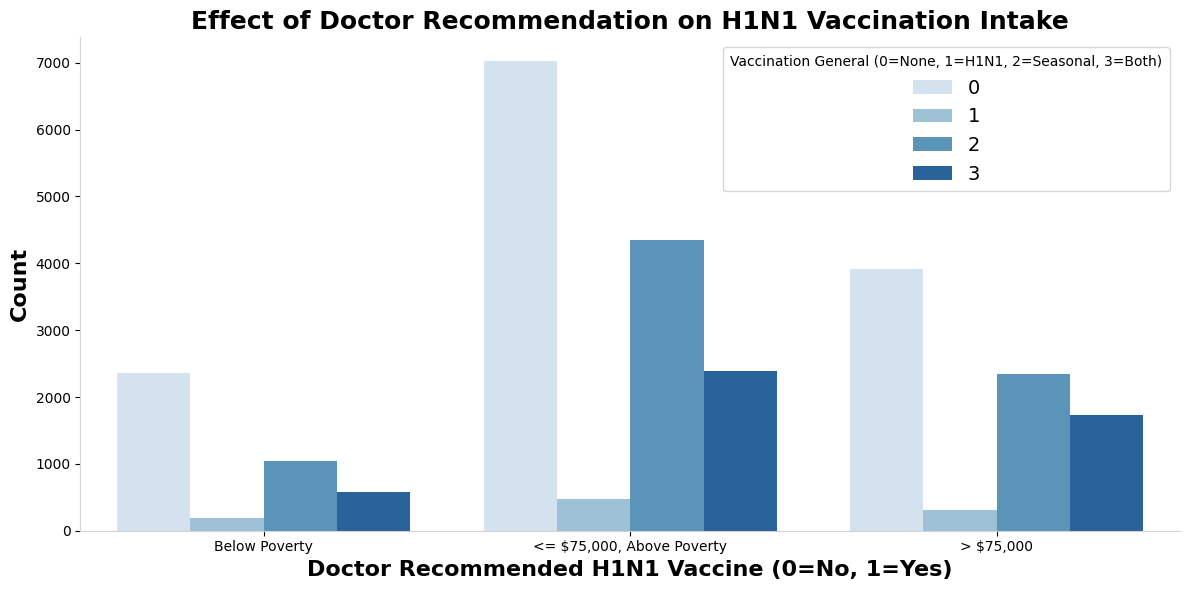

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(x="income_poverty", hue="Vaccination_General", data=df, palette=sns.color_palette("Blues", n_colors=4))
plt.title("Effect of Doctor Recommendation on H1N1 Vaccination Intake", fontweight='bold', fontsize=18)
plt.xlabel("Doctor Recommended H1N1 Vaccine (0=No, 1=Yes)", fontweight='bold', fontsize=16)
plt.ylabel("Count", fontweight='bold', fontsize=16)
plt.legend(title="Vaccination General (0=None, 1=H1N1, 2=Seasonal, 3=Both)", fontsize=14)

ax = plt.gca()  # Get current axes
# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Customize left and bottom spines
ax.spines["left"].set_color("lightgray")
ax.spines["bottom"].set_color("lightgray")

plt.tight_layout()
plt.show()

#Doctor recommendation significantly increases vaccine uptake, especially for both vaccines. When no recommendation is given, the majority remain unvaccinated.

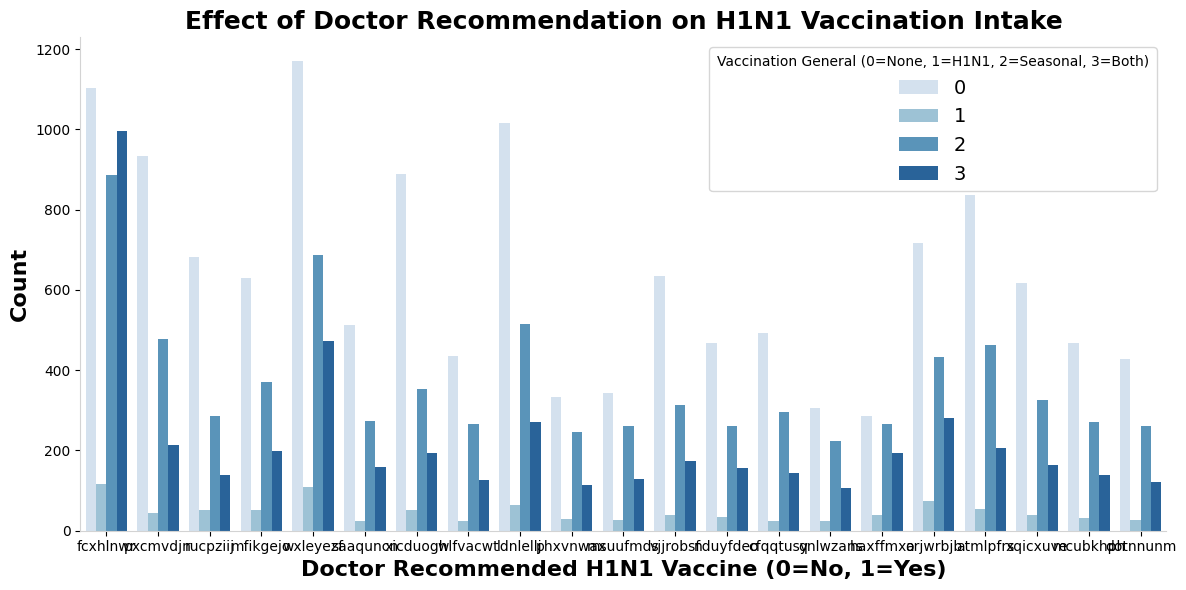

In [73]:
plt.figure(figsize=(12, 6))
sns.countplot(x="employment_industry", hue="Vaccination_General", data=df, palette=sns.color_palette("Blues", n_colors=4))
plt.title("Effect of Doctor Recommendation on H1N1 Vaccination Intake", fontweight='bold', fontsize=18)
plt.xlabel("Doctor Recommended H1N1 Vaccine (0=No, 1=Yes)", fontweight='bold', fontsize=16)
plt.ylabel("Count", fontweight='bold', fontsize=16)
plt.legend(title="Vaccination General (0=None, 1=H1N1, 2=Seasonal, 3=Both)", fontsize=14)

ax = plt.gca()  # Get current axes
# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Customize left and bottom spines
ax.spines["left"].set_color("lightgray")
ax.spines["bottom"].set_color("lightgray")

plt.tight_layout()
plt.show()

#Doctor recommendation significantly increases vaccine uptake, especially for both vaccines. When no recommendation is given, the majority remain unvaccinated.

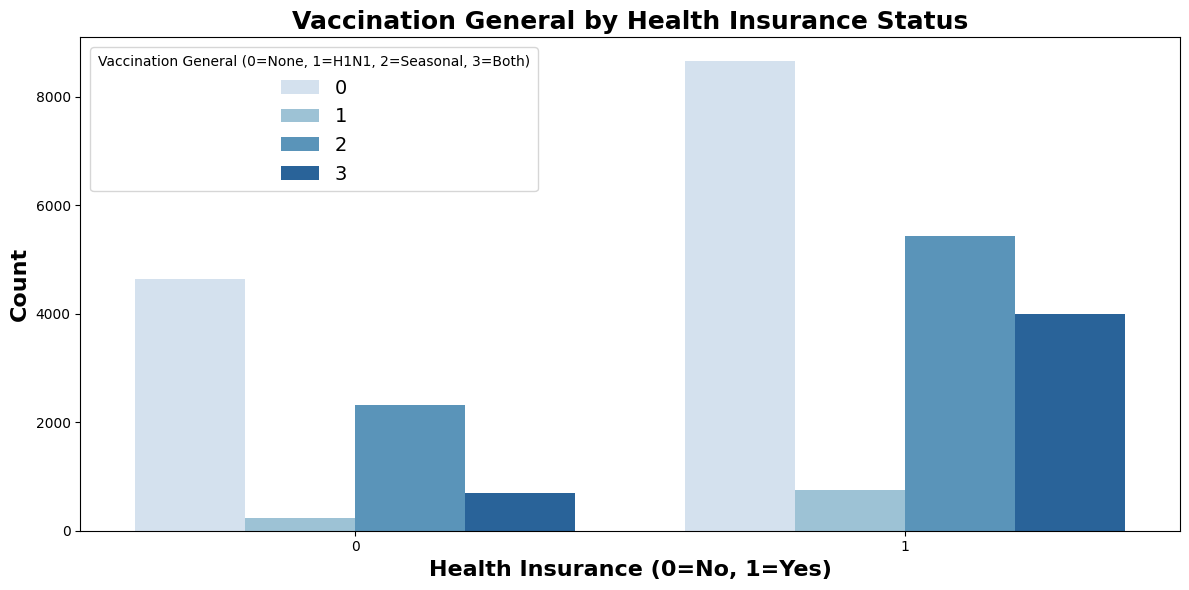

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x="health_insurance", hue="Vaccination_General", data=df, palette=sns.color_palette("Blues", n_colors=4))
plt.title("Vaccination General by Health Insurance Status", fontweight='bold', fontsize=18)
plt.xlabel("Health Insurance (0=No, 1=Yes)", fontweight='bold', fontsize=16)
plt.ylabel("Count", fontweight='bold', fontsize=16)
plt.legend(title="Vaccination General (0=None, 1=H1N1, 2=Seasonal, 3=Both)", fontsize=14)
plt.tight_layout()
plt.show()

#Individuals with health insurance are more likely to receive one or both vaccines. Lack of insurance correlates with lower vaccine uptake.

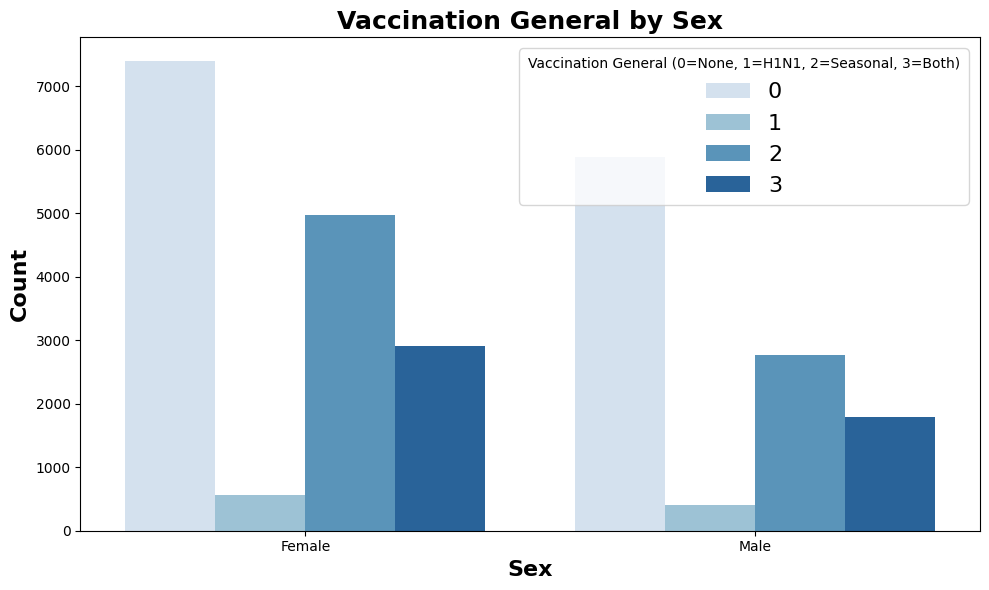

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x="sex", hue="Vaccination_General", data=df, palette=sns.color_palette("Blues", n_colors=4))
plt.title("Vaccination General by Sex", fontweight='bold', fontsize=18)
plt.xlabel("Sex", fontweight='bold', fontsize=16)
plt.ylabel("Count", fontweight='bold', fontsize=16)
plt.legend(title="Vaccination General (0=None, 1=H1N1, 2=Seasonal, 3=Both)", fontsize=16)
plt.tight_layout()
plt.show()

#Females show slightly higher vaccination rates than males, especially for receiving both vaccines.

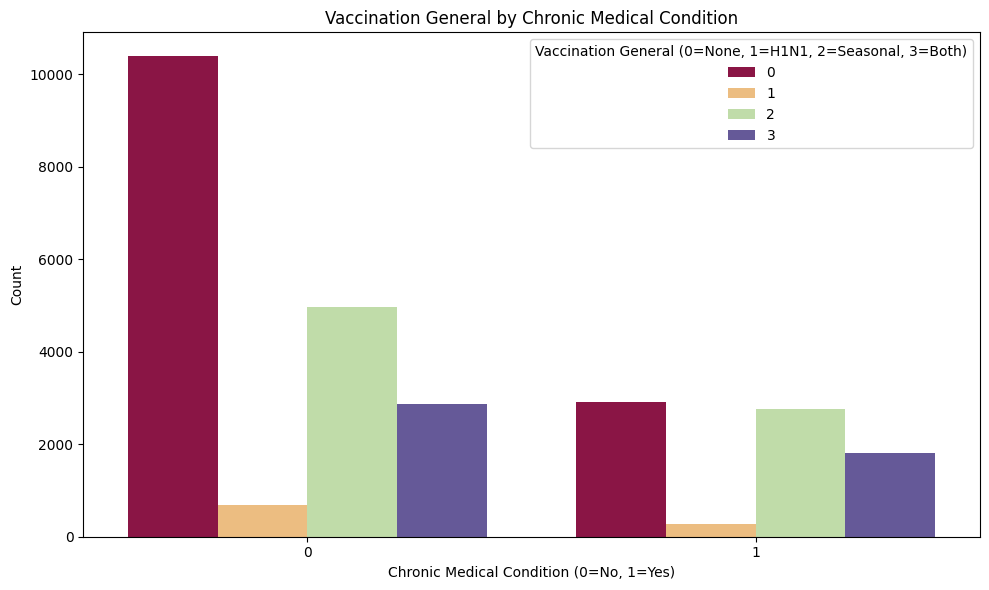

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x="chronic_med_condition", hue="Vaccination_General", data=df, palette="Spectral")
plt.title("Vaccination General by Chronic Medical Condition")
plt.xlabel("Chronic Medical Condition (0=No, 1=Yes)")
plt.ylabel("Count")
plt.legend(title="Vaccination General (0=None, 1=H1N1, 2=Seasonal, 3=Both)")
plt.tight_layout()
plt.show()

#Those with chronic conditions are more likely to receive at least one vaccine. The absence of such conditions is associated with higher vaccine refusal.

<ipython-input-53-bfd3001bdd2a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="age_group", y="Vaccination_General", data=df, palette="Set2", order= age_order)


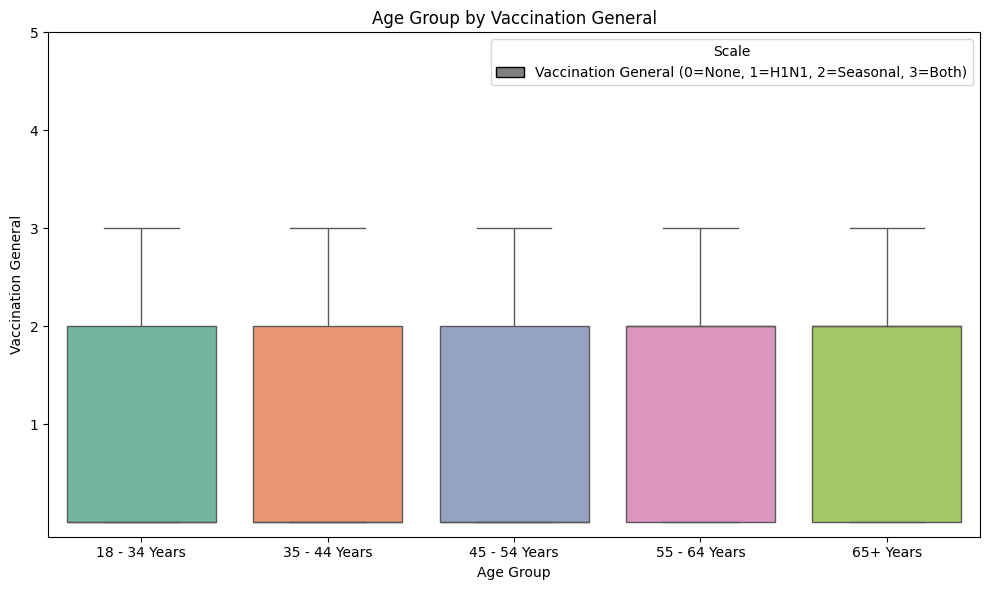

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot
sns.boxplot(x="age_group", y="Vaccination_General", data=df, palette="Set2", order= age_order)

# Titles and labels
plt.title("Age Group by Vaccination General")
plt.xlabel("Age Group")
plt.ylabel("Vaccination General")

# Set y-axis ticks to increments of 1
plt.yticks([1, 2, 3, 4, 5])

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gray', edgecolor='black', label='Vaccination General (0=None, 1=H1N1, 2=Seasonal, 3=Both)')]
plt.legend(handles=legend_elements, loc='upper right', title="Scale")

plt.tight_layout()
plt.show()

#Perceived risk of H1N1 increases with likelihood of vaccination. Those unconcerned about H1N1 are less likely to be vaccinated.

<ipython-input-81-437ed8795228>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Vaccination_General", y="opinion_h1n1_risk", data=df, palette=sns.color_palette("Blues", n_colors=4))


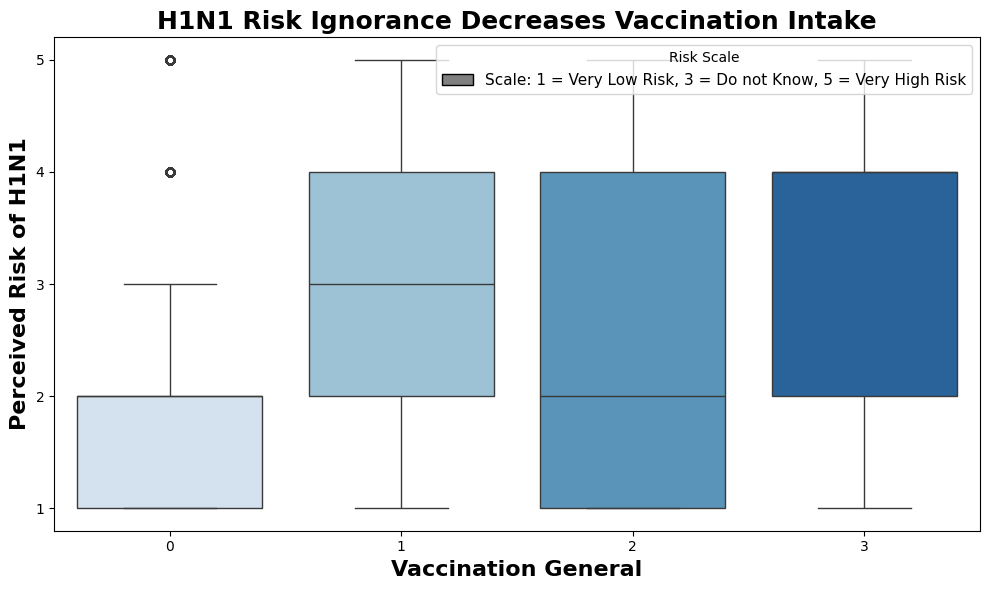

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot
sns.boxplot(x="Vaccination_General", y="opinion_h1n1_risk", data=df, palette=sns.color_palette("Blues", n_colors=4))

# Titles and labels
plt.title("H1N1 Risk Ignorance Decreases Vaccination Intake", fontweight='bold', fontsize=18)
plt.xlabel("Vaccination General", fontweight='bold', fontsize=16)
plt.ylabel("Perceived Risk of H1N1", fontweight='bold', fontsize=16)

# Set y-axis ticks to increments of 1
plt.yticks([1, 2, 3, 4, 5])

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gray', edgecolor='black', label='Scale: 1 = Very Low Risk, 3 = Do not Know, 5 = Very High Risk')]
plt.legend(handles=legend_elements, loc='upper right', title="Risk Scale", fontsize=11)

plt.tight_layout()
plt.show()

#Perceived risk of H1N1 increases with likelihood of vaccination. Those unconcerned about H1N1 are less likely to be vaccinated.

<ipython-input-82-2a19d6269006>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="age_group", y="opinion_h1n1_risk", data=df, palette=sns.color_palette("Blues", n_colors=5), order = age_order)


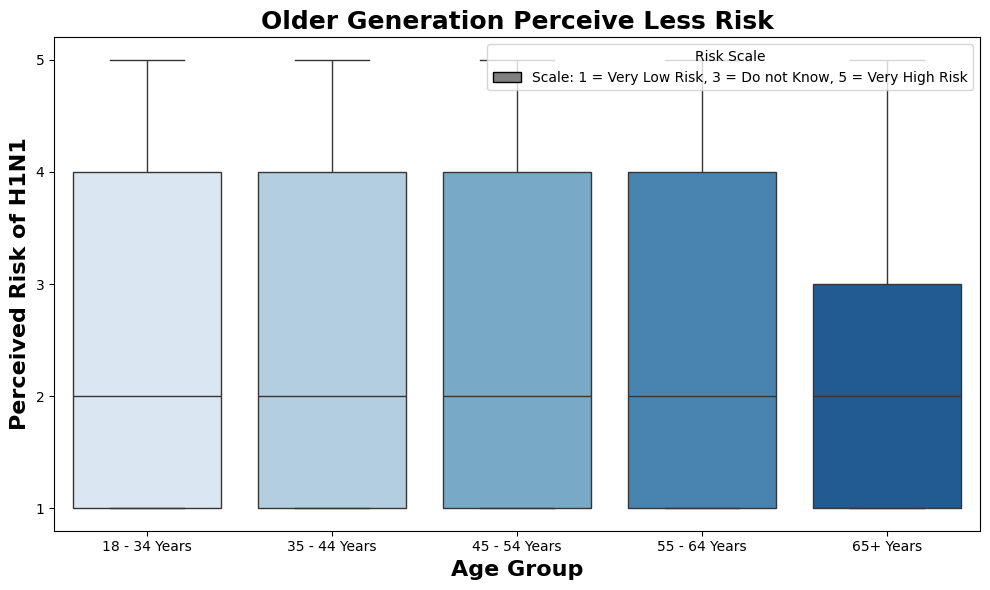

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot
sns.boxplot(x="age_group", y="opinion_h1n1_risk", data=df, palette=sns.color_palette("Blues", n_colors=5), order = age_order)

# Titles and labels
plt.title("Older Generation Perceive Less Risk", fontweight='bold', fontsize=18)
plt.xlabel("Age Group", fontweight='bold', fontsize=16)
plt.ylabel("Perceived Risk of H1N1", fontweight='bold', fontsize=16)

# Set y-axis ticks to increments of 1
plt.yticks([1, 2, 3, 4, 5])

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gray', edgecolor='black', label='Scale: 1 = Very Low Risk, 3 = Do not Know, 5 = Very High Risk')]
plt.legend(handles=legend_elements, loc='upper right', title="Risk Scale")

plt.tight_layout()
plt.show()


<ipython-input-25-decc3d397c37>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="age_group", y="opinion_seas_risk", data=df, palette="Set2", order = age_order)


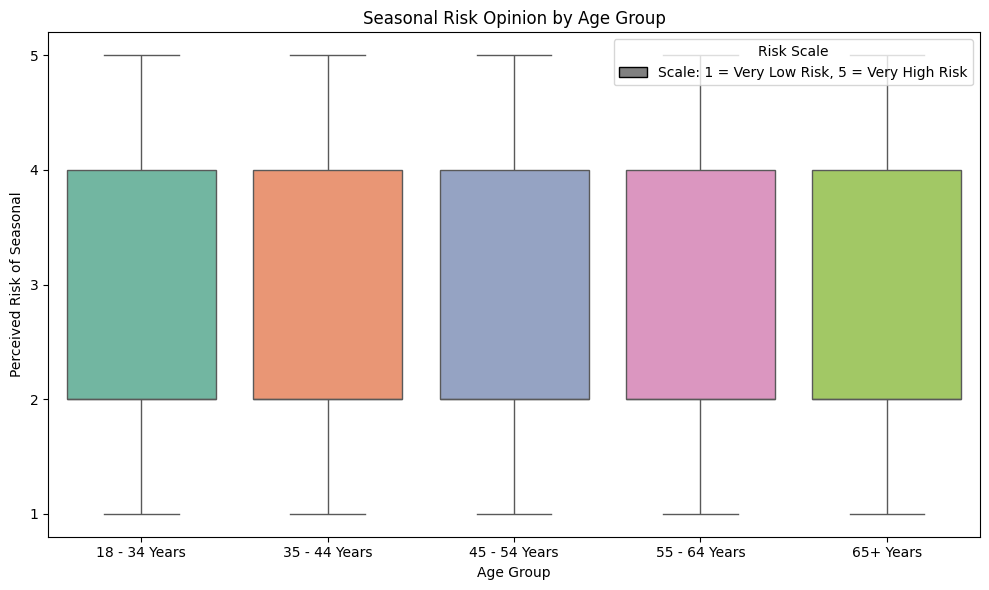

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot
sns.boxplot(x="age_group", y="opinion_seas_risk", data=df, palette=sns.color_palette("Blues", n_colors=5), order = age_order)

# Titles and labels
plt.title("Seasonal Risk Opinion by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Perceived Risk of Seasonal")

# Set y-axis ticks to increments of 1
plt.yticks([1, 2, 3, 4, 5])

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gray', edgecolor='black', label='Scale: 1 = Very Low Risk, 5 = Very High Risk')]
plt.legend(handles=legend_elements, loc='upper right', title="Risk Scale")

plt.tight_layout()
plt.show()

<ipython-input-19-766a9ad28e56>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="age_group", y="opinion_seas_vacc_effective", data=df, palette=sns.color_palette("Blues", n_colors=5), order = age_order)


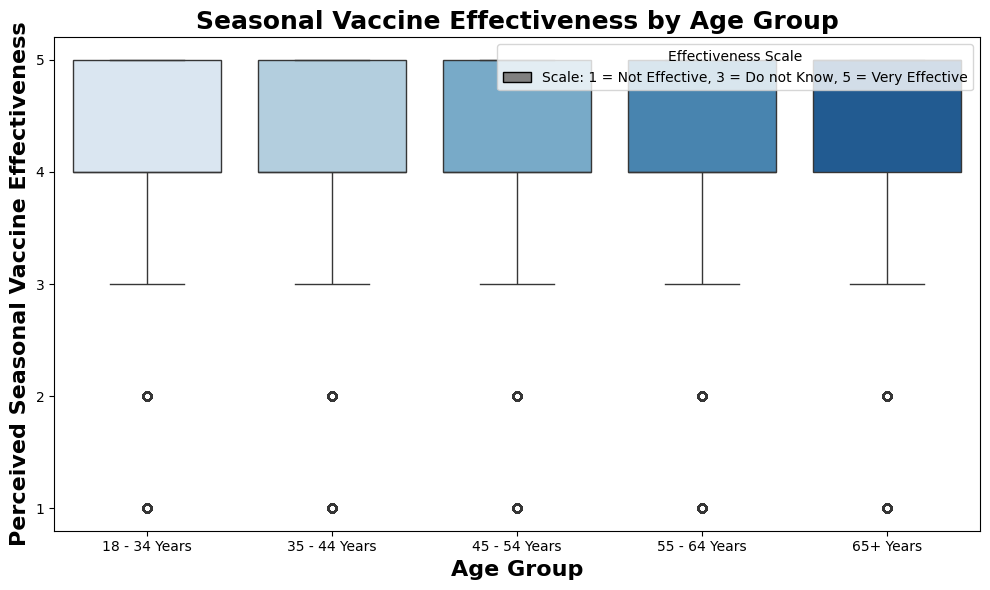

In [19]:
plt.figure(figsize=(10, 6))

# Plot
sns.boxplot(x="age_group", y="opinion_seas_vacc_effective", data=df, palette=sns.color_palette("Blues", n_colors=5), order = age_order)

# Titles and labels
plt.title("Seasonal Vaccine Effectiveness by Age Group", fontweight='bold', fontsize=18)
plt.xlabel("Age Group", fontweight='bold', fontsize=16)
plt.ylabel("Perceived Seasonal Vaccine Effectiveness", fontweight='bold', fontsize=16)

# Set y-axis ticks to increments of 1
plt.yticks([1, 2, 3, 4, 5])

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gray', edgecolor='black', label='Scale: 1 = Not Effective, 3 = Do not Know, 5 = Very Effective')]
plt.legend(handles=legend_elements, loc='upper right', title="Effectiveness Scale")

plt.tight_layout()
plt.show()

<ipython-input-20-4d32c87bba68>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="age_group", y="opinion_h1n1_vacc_effective", data=df, palette=sns.color_palette("Blues", n_colors=5), order = age_order)


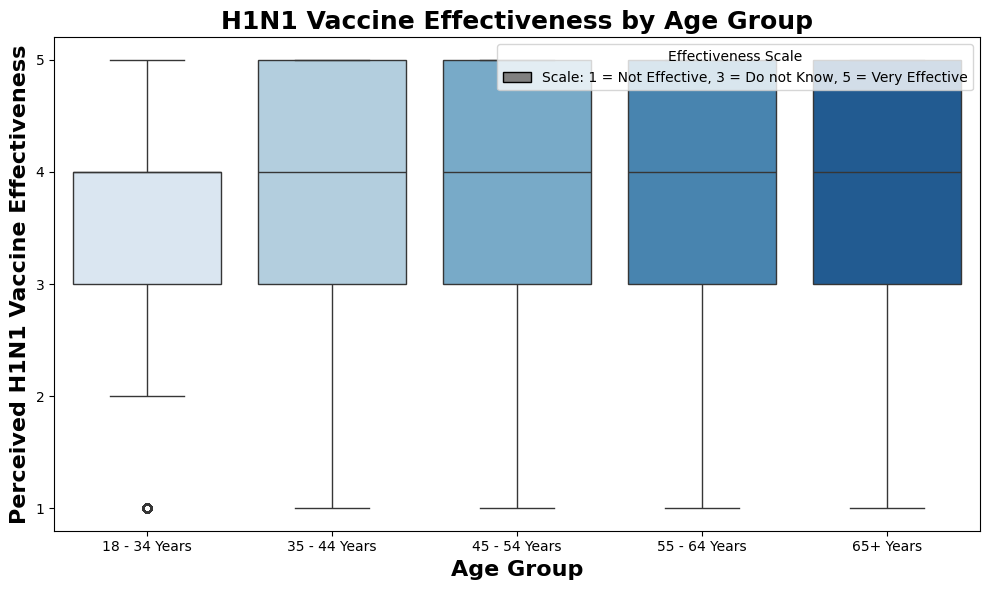

In [20]:
plt.figure(figsize=(10, 6))

# Plot
sns.boxplot(x="age_group", y="opinion_h1n1_vacc_effective", data=df, palette=sns.color_palette("Blues", n_colors=5), order = age_order)

# Titles and labels
plt.title("H1N1 Vaccine Effectiveness by Age Group", fontweight='bold', fontsize=18)
plt.xlabel("Age Group", fontweight='bold', fontsize=16)
plt.ylabel("Perceived H1N1 Vaccine Effectiveness", fontweight='bold', fontsize=16)

# Set y-axis ticks to increments of 1
plt.yticks([1, 2, 3, 4, 5])

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gray', edgecolor='black', label='Scale: 1 = Not Effective, 3 = Do not Know, 5 = Very Effective')]
plt.legend(handles=legend_elements, loc='upper right', title="Effectiveness Scale")

plt.tight_layout()
plt.show()

<ipython-input-21-c32ddf1a5ebe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="age_group", y="h1n1_concern", data=df, palette=sns.color_palette("Blues", n_colors=4), order = age_order)
<ipython-input-21-c32ddf1a5ebe>:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="age_group", y="h1n1_concern", data=df, palette=sns.color_palette("Blues", n_colors=4), order = age_order)


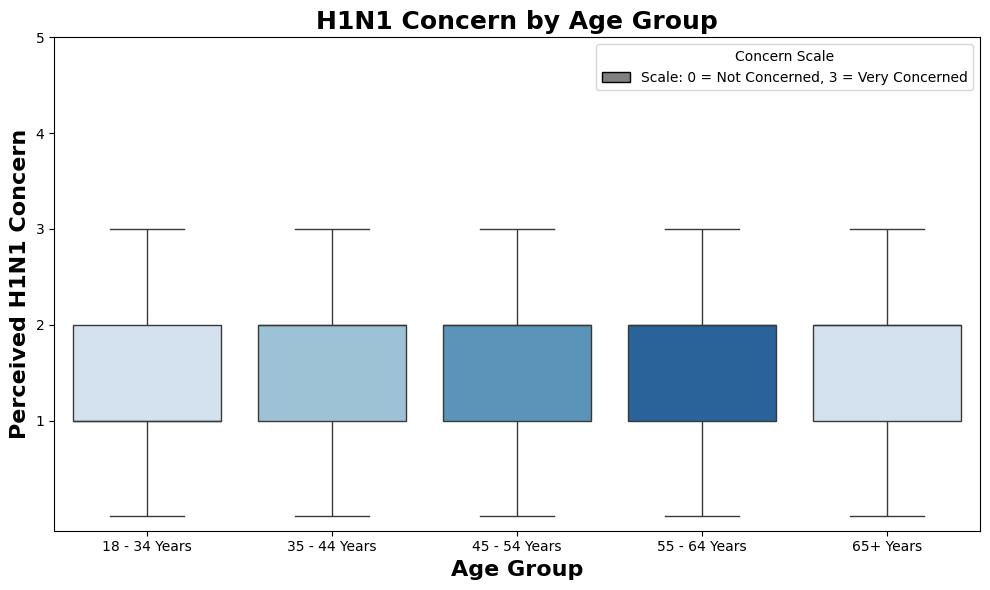

In [21]:
plt.figure(figsize=(10, 6))

# Plot
sns.boxplot(x="age_group", y="h1n1_concern", data=df, palette=sns.color_palette("Blues", n_colors=4), order = age_order)

# Titles and labels
plt.title("H1N1 Concern by Age Group", fontweight='bold', fontsize=18)
plt.xlabel("Age Group", fontweight='bold', fontsize=16)
plt.ylabel("Perceived H1N1 Concern", fontweight='bold', fontsize=16)

# Set y-axis ticks to increments of 1
plt.yticks([1, 2, 3, 4, 5])

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gray', edgecolor='black', label='Scale: 0 = Not Concerned, 3 = Very Concerned')]
plt.legend(handles=legend_elements, loc='upper right', title="Concern Scale")

plt.tight_layout()
plt.show()

<ipython-input-38-0cc95ade33d1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="age_group", y="h1n1_knowledge", data=df, palette="Set2", order = age_order)


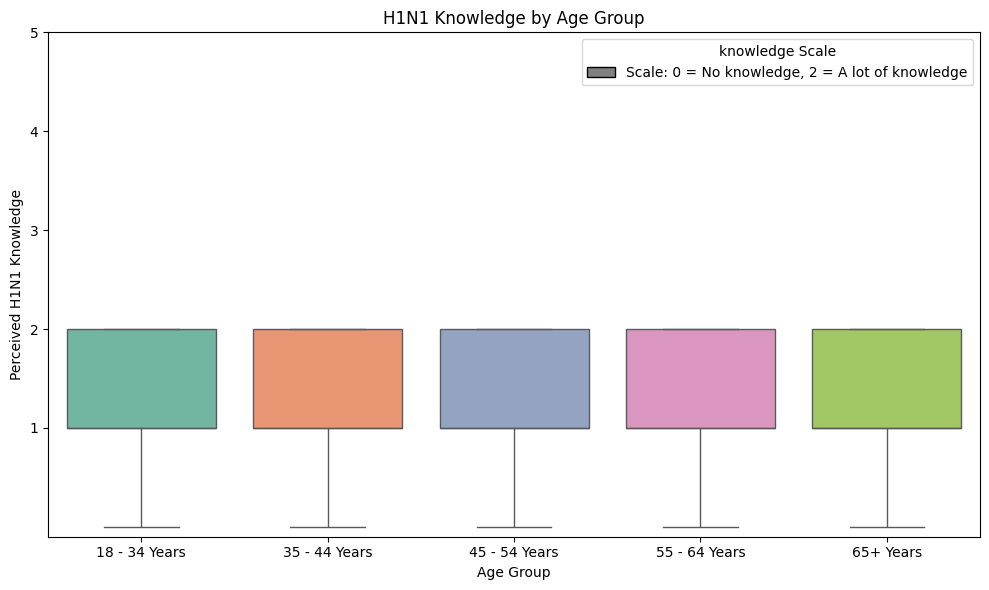

In [38]:
plt.figure(figsize=(10, 6))

# Plot
sns.boxplot(x="age_group", y="h1n1_knowledge", data=df, palette="Set2", order = age_order)

# Titles and labels
plt.title("H1N1 Knowledge by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Perceived H1N1 Knowledge")

# Set y-axis ticks to increments of 1
plt.yticks([1, 2, 3, 4, 5])

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gray', edgecolor='black', label='Scale: 0 = No knowledge, 2 = A lot of knowledge')]
plt.legend(handles=legend_elements, loc='upper right', title="knowledge Scale")

plt.tight_layout()
plt.show()

<ipython-input-23-5f22d06012e3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="age_group", y="doctor_recc_h1n1", data=df, palette=sns.color_palette("Blues", n_colors=4), order = age_order)
<ipython-input-23-5f22d06012e3>:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="age_group", y="doctor_recc_h1n1", data=df, palette=sns.color_palette("Blues", n_colors=4), order = age_order)


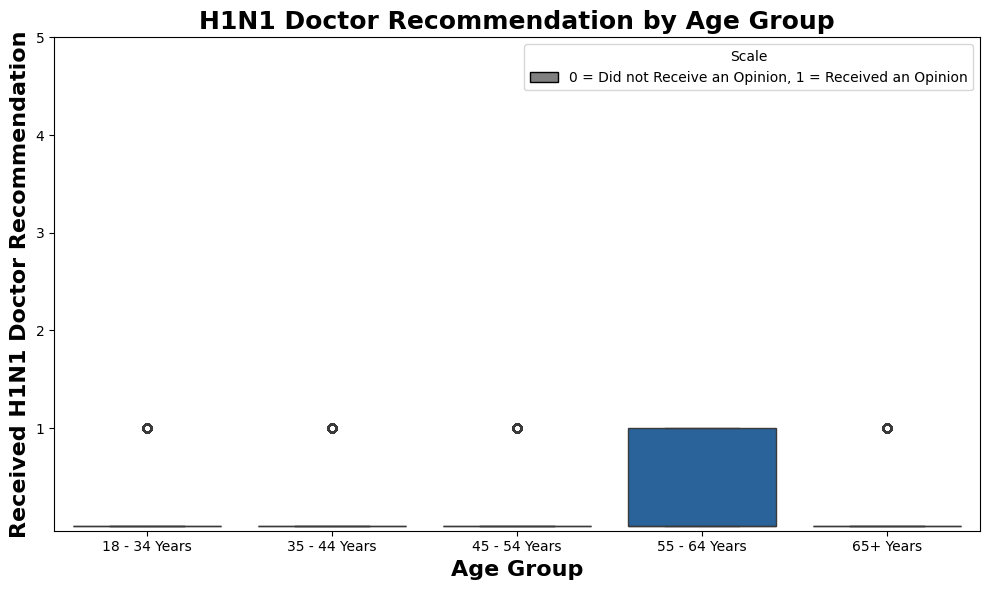

In [23]:
plt.figure(figsize=(10, 6))

# Plot
sns.boxplot(x="age_group", y="doctor_recc_h1n1", data=df, palette=sns.color_palette("Blues", n_colors=4), order = age_order)

# Titles and labels
plt.title("H1N1 Doctor Recommendation by Age Group", fontweight='bold', fontsize=18)
plt.xlabel("Age Group", fontweight='bold', fontsize=16)
plt.ylabel("Received H1N1 Doctor Recommendation", fontweight='bold', fontsize=16)

# Set y-axis ticks to increments of 1
plt.yticks([1, 2, 3, 4, 5])

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gray', edgecolor='black', label='0 = Did not Receive an Opinion, 1 = Received an Opinion')]
plt.legend(handles=legend_elements, loc='upper right', title="Scale")

plt.tight_layout()
plt.show()

<ipython-input-58-efde45c39c07>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="age_group", y="doctor_recc_seasonal", data=df, palette="Set2", order = age_order)


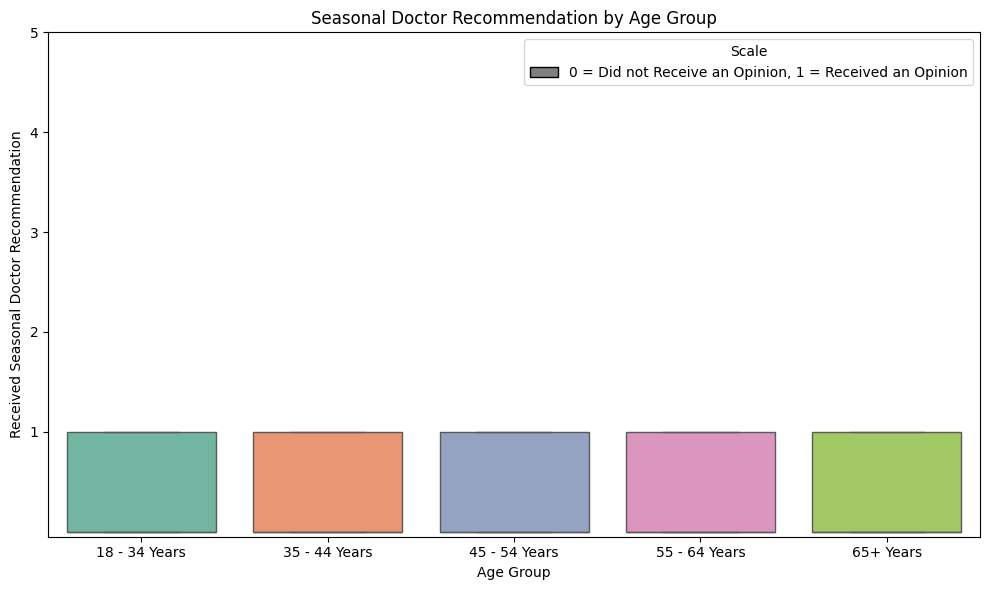

In [58]:
plt.figure(figsize=(10, 6))

# Plot
sns.boxplot(x="age_group", y="doctor_recc_seasonal", data=df, palette="Set2", order = age_order)

# Titles and labels
plt.title("Seasonal Doctor Recommendation by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Received Seasonal Doctor Recommendation")

# Set y-axis ticks to increments of 1
plt.yticks([1, 2, 3, 4, 5])

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gray', edgecolor='black', label='0 = Did not Receive an Opinion, 1 = Received an Opinion')]
plt.legend(handles=legend_elements, loc='upper right', title="Scale")

plt.tight_layout()
plt.show()

<ipython-input-27-0abc7feb8482>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="h1n1_concern", y="h1n1_knowledge", data=df, palette=sns.color_palette("Blues", n_colors=4))


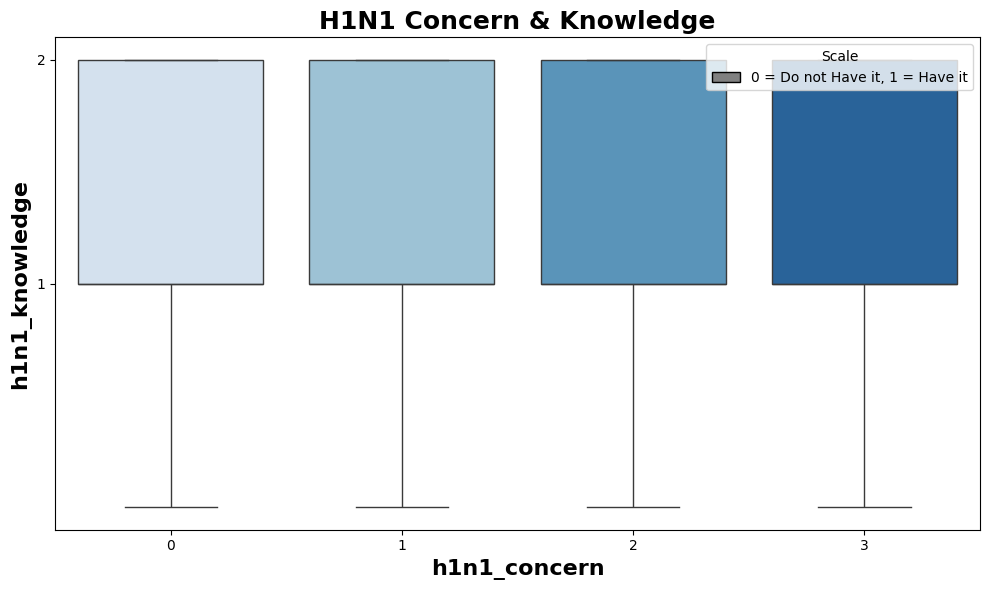

In [27]:
plt.figure(figsize=(10, 6))

# Plot
sns.boxplot(x="h1n1_concern", y="h1n1_knowledge", data=df, palette=sns.color_palette("Blues", n_colors=4))

# Titles and labels
plt.title("H1N1 Concern & Knowledge", fontweight='bold', fontsize=18)
plt.xlabel("h1n1_concern", fontweight='bold', fontsize=16)
plt.ylabel("h1n1_knowledge", fontweight='bold', fontsize=16)

# Set y-axis ticks to increments of 1
plt.yticks([1, 2])

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gray', edgecolor='black', label='0 = Do not Have it, 1 = Have it')]
plt.legend(handles=legend_elements, loc='upper right', title="Scale")

plt.tight_layout()
plt.show()

<ipython-input-28-cd92d2aa196b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="age_group", y="health_insurance", data=df, palette=sns.color_palette("Blues", n_colors=4), order = age_order)
<ipython-input-28-cd92d2aa196b>:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="age_group", y="health_insurance", data=df, palette=sns.color_palette("Blues", n_colors=4), order = age_order)


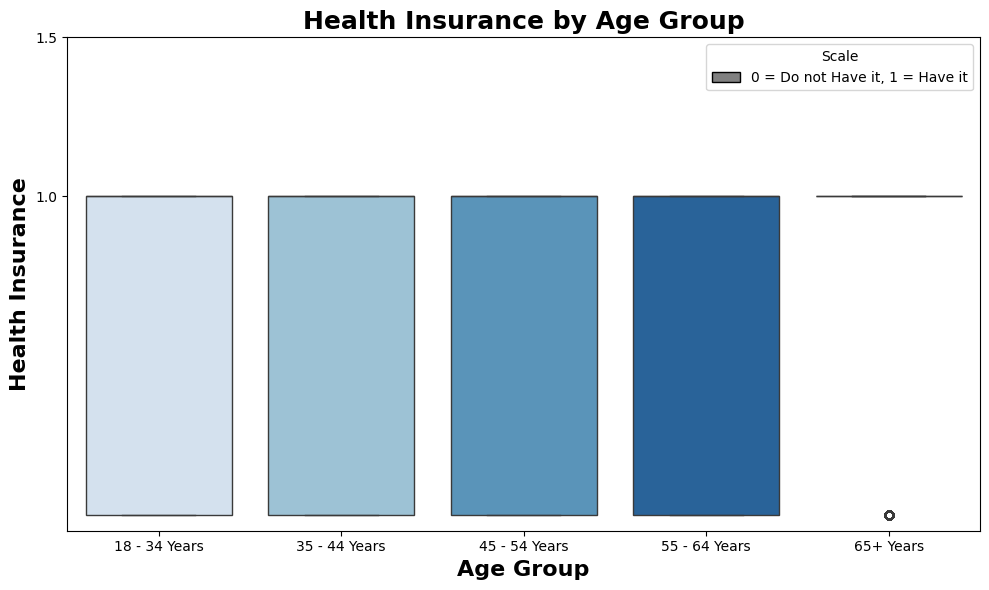

In [28]:
plt.figure(figsize=(10, 6))

# Plot
sns.boxplot(x="age_group", y="health_insurance", data=df, palette=sns.color_palette("Blues", n_colors=4), order = age_order)

# Titles and labels
plt.title("Health Insurance by Age Group", fontweight='bold', fontsize=18)
plt.xlabel("Age Group", fontweight='bold', fontsize=16)
plt.ylabel("Health Insurance", fontweight='bold', fontsize=16)

# Set y-axis ticks to increments of 1
plt.yticks([1, 1.5])

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gray', edgecolor='black', label='0 = Do not Have it, 1 = Have it')]
plt.legend(handles=legend_elements, loc='upper right', title="Scale")

plt.tight_layout()
plt.show()

In [ ]:
summary_stats = df.describe()
summary_stats

,Vaccination_General,doctor_recc_h1n1,doctor_recc_seasonal,health_insurance,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,h1n1_concern,h1n1_knowledge,chronic_med_condition
count,5430.000000,5431.000000,5431.000000,5431.000000,5431.000000,5430.000000,5430.000000,5431.000000,5431.000000,5431.000000
mean,1.156722,0.243970,0.341742,0.708157,2.352237,4.003683,2.737017,1.586448,1.258148,0.280059
std,1.213878,0.429514,0.474337,0.454652,1.292361,1.113550,1.395758,0.909856,0.622488,0.449069
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,0.000000,1.000000,1.000000,4.000000,5.000000,4.000000,2.000000,2.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,3.000000,2.000000,1.000000


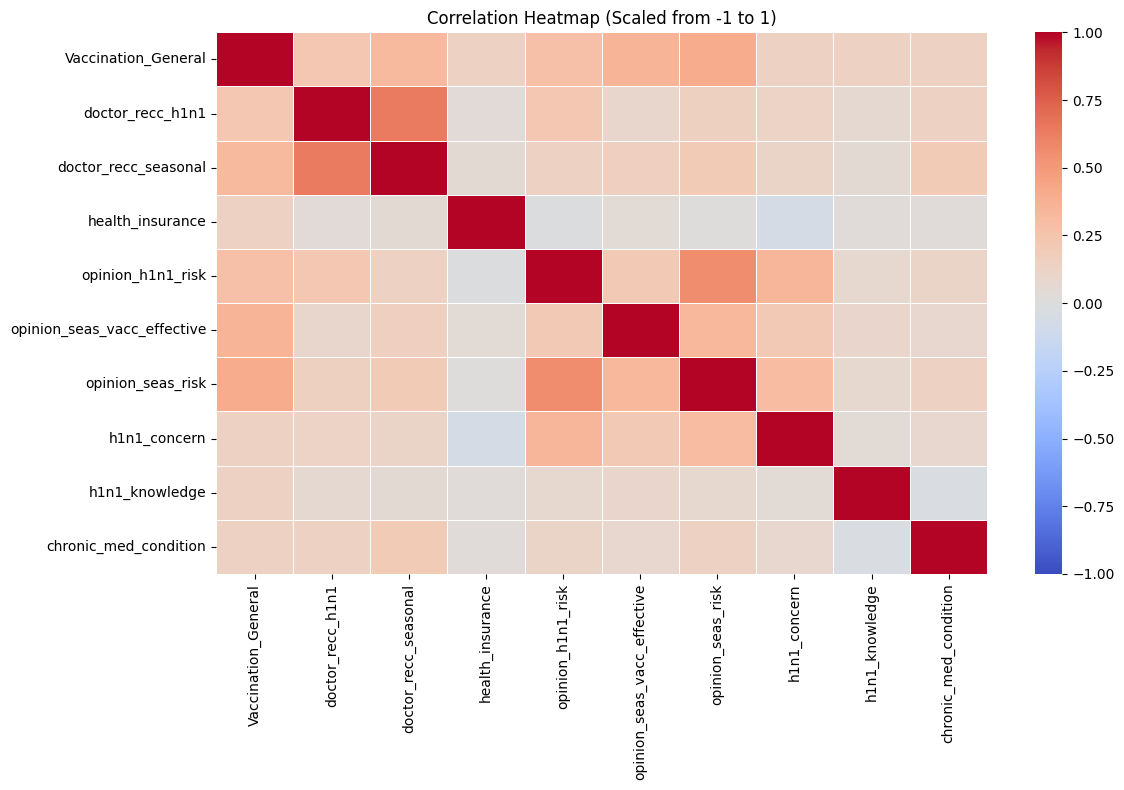

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.corr(numeric_only=True),
    cmap="coolwarm",
    annot=False,
    linewidths=0.5,
    vmin=-1,  # Minimum of the scale
    vmax=1    # Maximum of the scale
)
plt.title("Correlation Heatmap (Scaled from -1 to 1)")
plt.tight_layout()
plt.show()


#Vaccination variables show positive correlation with doctor recommendations and risk perceptions. Behavioral and opinion variables cluster closely with vaccine uptake.

<ipython-input-20-0c608897dbd5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Vaccination_General", y="h1n1_knowledge", data=df, palette="crest")


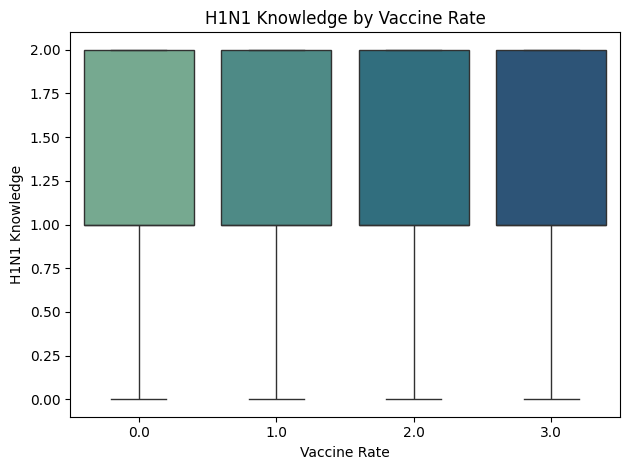

In [ ]:
sns.boxplot(x="Vaccination_General", y="h1n1_knowledge", data=df, palette="crest")
plt.title("H1N1 Knowledge by Vaccine Rate")
plt.xlabel("Vaccine Rate")
plt.ylabel("H1N1 Knowledge")
plt.tight_layout()
plt.show()

#Higher H1N1 knowledge corresponds with greater vaccine uptake. Individuals with limited knowledge are more vaccine-hesitant.

<ipython-input-22-cf6e84baf00d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Vaccination_General", y="opinion_seas_vacc_effective", data=df, palette="Blues")


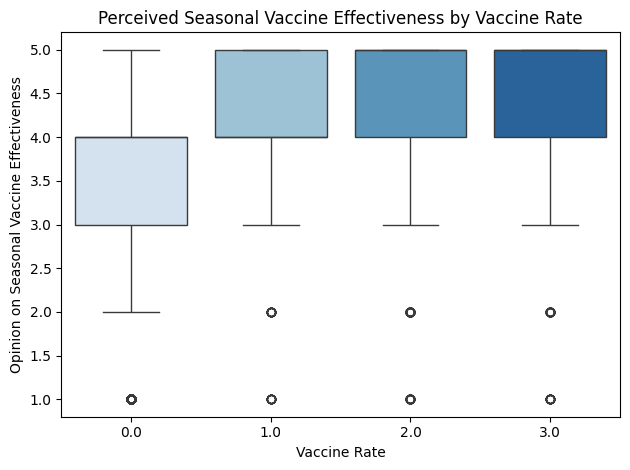

In [ ]:
sns.boxplot(x="Vaccination_General", y="opinion_seas_vacc_effective", data=df, palette="Blues")
plt.title("Perceived Seasonal Vaccine Effectiveness by Vaccine Rate")
plt.xlabel("Vaccine Rate")
plt.ylabel("Opinion on Seasonal Vaccine Effectiveness")
plt.tight_layout()
plt.show()

#Belief in seasonal vaccine effectiveness drives higher vaccine uptake. Skepticism is linked to vaccine refusal.

<ipython-input-23-8cb168d9b5d4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Vaccination_General", y="opinion_seas_risk", data=df, palette="GnBu")


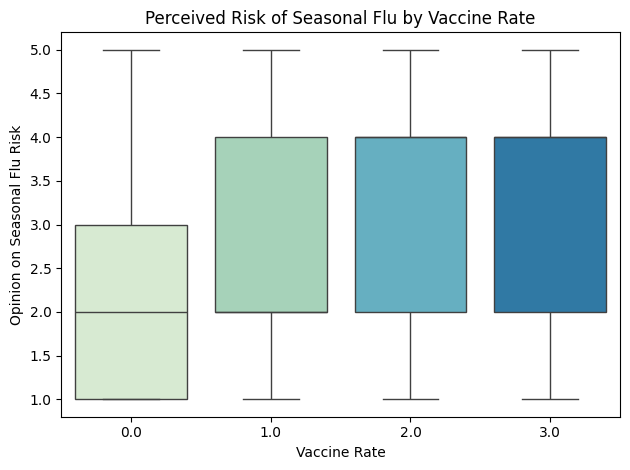

In [ ]:
sns.boxplot(x="Vaccination_General", y="opinion_seas_risk", data=df, palette="GnBu")
plt.title("Perceived Risk of Seasonal Flu by Vaccine Rate")
plt.xlabel("Vaccine Rate")
plt.ylabel("Opinion on Seasonal Flu Risk")
plt.tight_layout()
plt.show()

#Those who believe seasonal flu poses a risk are more likely to be vaccinated. Low perceived risk aligns with lower vaccination.

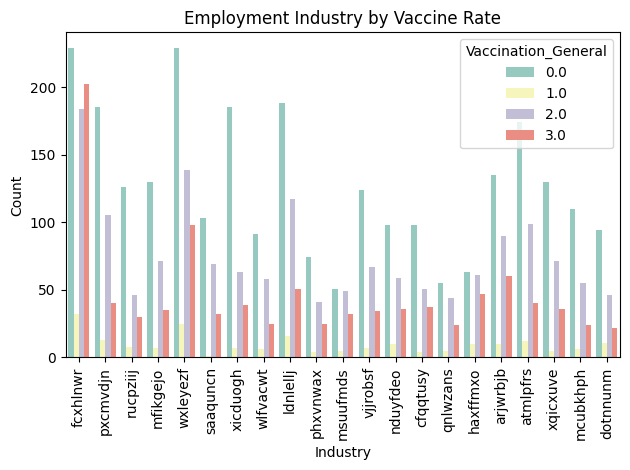

In [ ]:
sns.countplot(x="employment_industry", hue="Vaccination_General", data=df, palette="Set3")
plt.title("Employment Industry by Vaccine Rate")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Certain industries (e.g., healthcare, education) are associated with higher vaccination rates. Others like construction and manufacturing show more hesitancy.

In [ ]:
# Step 1: Install nbconvert (usually already available)
!pip install nbconvert

# Step 2: Convert the notebook to HTML
!jupyter nbconvert --to html /content/EDA_withTargetVar.ipynb

# Step 3: Download the HTML file (Optional - creates download link)
from google.colab import files
files.download("EDA_withTargetVar.html")


[NbConvertApp] Converting notebook /content/EDA_withTargetVar.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 34 image(s).
[NbConvertApp] Writing 1780257 bytes to /content/EDA_withTargetVar.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>